In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/BlockBucks/data rpw.csv',encoding='latin-1')
df.head()

<ipython-input-4-feaab08a27eb>:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/BlockBucks/data rpw.csv',encoding='latin-1')


,id,period,source_code,source_name,source_income,destination_code,destination_name,destination_region,destination_income,destination_lending,firm,firm_type,payment instrument,access point,speed actual,cc1 lcu amount,cc1 denomination amount,cc1 lcu code,cc1 lcu fee,cc1 lcu fx rate,cc1 fx margin,cc1 total cost %,cc2 lcu amount,cc2 denomination amount,cc2 lcu code,cc2 lcu fee,cc2 lcu fx rate,cc2 fx margin,cc2 total cost %,inter lcu bank fx,transparent,Standard Note,note2,receiving network coverage,pickup location,pickup method,date,corridor
0,620160001,2016_2Q,AGO,Angola,Lower middle income,NAM,Namibia,Sub-Saharan Africa,Upper middle income,IBRD,MoneyGram,Money Transfer Operator,Cash,Agent,Less than one hour,33000,200,AOA,2900.0,0.0,7.0,16.0,83000,500,AOA,5700.0,0.0,7.0,14.0,0.0,yes,NaN,NaN,High,Agent,Cash,11-May-16,AGONAM
1,620160002,2016_2Q,AGO,Angola,Lower middle income,NAM,Namibia,Sub-Saharan Africa,Upper middle income,IBRD,Real Transfer,Money Transfer Operator,"Bank account transfer,Cash",Agent,Same day,33000,200,AOA,3300.0,0.0,4.0,14.0,83000,500,AOA,6300.0,0.0,4.0,12.0,0.0,yes,NaN,NaN,High,Agent,Cash,11-May-16,AGONAM
2,620160003,2016_2Q,AGO,Angola,Lower middle income,NAM,Namibia,Sub-Saharan Africa,Upper middle income,IBRD,Standard Bank,Bank,Bank account transfer,Bank branch,Next day,33000,200,AOA,9075.0,1.0,0.0,28.0,83000,500,AOA,9075.0,1.0,0.0,11.0,1.0,no,This RSP is not transparent: the exchange rate...,NaN,Low,NaN,Bank account,11-May-16,AGONAM
3,620160004,2016_2Q,ARE,United Arab Emirates,High income,BGD,Bangladesh,South Asia,Lower middle income,IDA,Al Ansari,Money Transfer Operator,Cash,Agent,Less than one hour,735,200,AED,15.0,21.0,0.0,2.0,1835,500,AED,20.0,21.0,0.0,1.0,21.0,yes,NaN,NaN,High,Agent,Cash,09-May-16,AREBGD
4,620160005,2016_2Q,ARE,United Arab Emirates,High income,BGD,Bangladesh,South Asia,Lower middle income,IDA,Al Fardan Exchange,Money Transfer Operator,Cash,Agent,Less than one hour,735,200,AED,15.0,21.0,0.0,2.0,1835,500,AED,15.0,21.0,0.0,1.0,21.0,yes,NaN,NaN,High,Agent,Cash,09-May-16,AREBGD


In [ ]:
df_india.corr()

ValueError: could not convert string to float: '2016_2Q'

In [ ]:
df_india=df[df['destination_name']=="India"]
df_india.isnull().sum()

,0
id,0
period,0
source_code,0
source_name,0
source_income,0
destination_code,0
destination_name,0
destination_region,0
destination_income,0
destination_lending,0


<Axes: xlabel='source_name'>

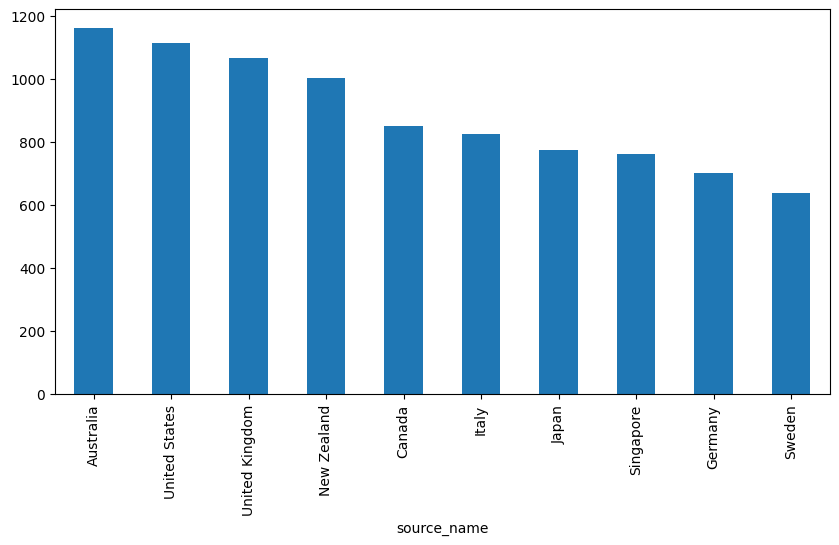

In [ ]:
plt.figure(figsize=(10,5))
df_india['source_name'].value_counts()[:10].plot(kind='bar')

In [ ]:
df_india['firm_type'].value_counts()

,count
firm_type,
Money Transfer Operator,9624
Bank,3293
Bank / Money Transfer Operator,147
Mobile Operator,121
Money Transfer Operator / Post office,73
Post office,32


<BarContainer object of 6 artists>

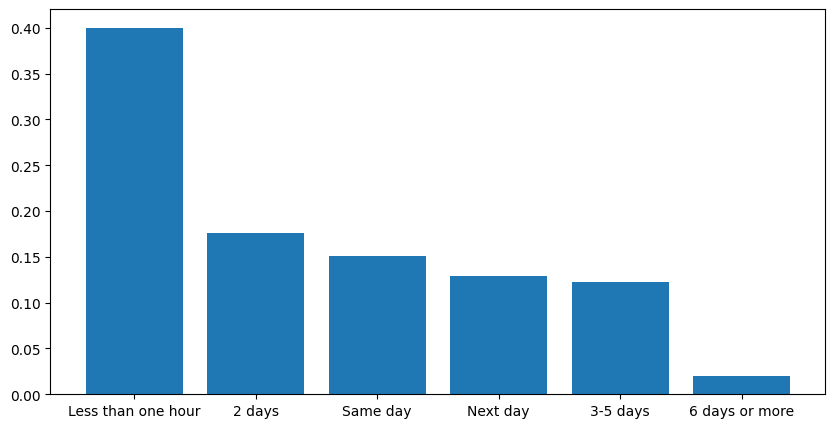

In [ ]:
speed_actual=df_india['speed actual'].value_counts()/df_india.shape[0]
plt.figure(figsize=(10,5))
plt.bar(speed_actual.keys(),speed_actual.values)

In [ ]:
df_india['cc1 lcu fx rate'].describe()

,cc1 lcu fx rate
count,13284.000000
mean,62.981306
std,57.539439
min,0.000000
25%,18.000000
50%,53.166800
75%,82.250000
max,270.197200


In [ ]:
df_india['cc1 total cost %'].describe()

,cc1 total cost %
count,13284.000000
mean,5.402168
std,5.417875
min,-3.950000
25%,2.290000
50%,3.580000
75%,6.042500
max,46.080000


<Axes: ylabel='cc1 total cost %'>

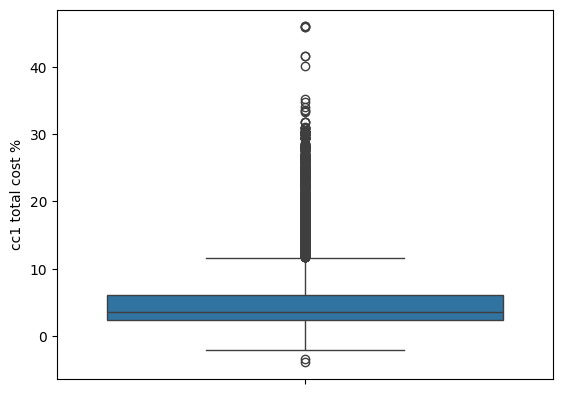

In [ ]:
sns.boxplot(df_india['cc1 total cost %'])

In [ ]:
grouped = df_india.groupby(['speed actual', 'firm']).size().reset_index(name='count')
grouped['total'] = grouped.groupby('speed actual')['count'].transform('sum')
grouped['percentage'] = (grouped['count'] / grouped['total']) * 100
top_firms = grouped.groupby('speed actual').apply(lambda x: x.nlargest(3, 'percentage')).reset_index(drop=True)
print(top_firms)

          speed actual                   firm  count  total  percentage
0               2 days             WorldRemit    164   2341    7.005553
1               2 days    State Bank of India    120   2341    5.126015
2               2 days      Kotak Click2Remit    114   2341    4.869714
3             3-5 days  Banca Intesa SanPaolo     74   1628    4.545455
4             3-5 days          Western Union     71   1628    4.361179
5             3-5 days                    Ria     66   1628    4.054054
6       6 days or more        Japan Post Bank     41    266   15.413534
7       6 days or more                    SEB     40    266   15.037594
8       6 days or more               Citibank     32    266   12.030075
9   Less than one hour          Western Union   1346   5320   25.300752
10  Less than one hour              MoneyGram    868   5320   16.315789
11  Less than one hour             WorldRemit    316   5320    5.939850
12            Next day          Western Union    341   1723   19

In [ ]:
df_india.groupby(['source_name','speed actual']).count()

id  period  source_code  source_income  \
source_name   speed actual                                                  
Australia     2 days              381     381          381            381   
              3-5 days            196     196          196            196   
              Less than one hour  305     305          305            305   
              Next day            116     116          116            116   
              Same day            165     165          165            165   
...                               ...     ...          ...            ...   
United States 3-5 days            216     216          216            216   
              6 days or more       16      16           16             16   
              Less than one hour  493     493          493            493   
              Next day            134     134          134            134   
              Same day            182     182          182            182   

                                  destination_code  destination_name  \
source_name   speed actual                                             
Australia     2 days                           381               381   
              3-5 days                         196               196   
              Less than one hour               305               305   
              Next day                         116               116   
              Same day                         165               165   
...                                            ...               ...   
United States 3-5 days                         216               216   
              6 days or more                    16                16   
              Less than one hour               493               493   
              Next day                         134               134   
              Same day                         182               182   

                                  destination_region  destination_income  \
source_name   speed actual                                                 
Australia     2 days                             381                 381   
              3-5 days                           196                 196   
              Less than one hour                 305                 305   
              Next day                           116                 116   
              Same day                           165                 165   
...                                              ...                 ...   
United States 3-5 days                           216                 216   
              6 days or more                      16                  16   
              Less than one hour                 493                 493   
              Next day                           134                 134   
              Same day                           182                 182   

                                  destination_lending  firm  firm_type  \
source_name   speed actual                                               
Australia     2 days                              381   381        381   
              3-5 days                            196   196        196   
              Less than one hour                  305   305        305   
              Next day                            116   116        116   
              Same day                            165   165        165   
...                                               ...   ...        ...   
United States 3-5 days                            216   216        216   
              6 days or more                       16    16         16   
              Less than one hour                  493   493        493   
              Next day                            134   134        134   
              Same day                            182   182        182   

                                  payment instrument  access point  \
source_name   speed actual                                           
Aust

In [ ]:
grouped = df_india.groupby(['source_name', 'speed actual']).size().reset_index(name='count')
grouped['total'] = grouped.groupby('source_name')['count'].transform('sum')
grouped['percentage'] = (grouped['count'] / grouped['total']) * 100
top_sources = grouped.groupby('source_name')['total'].sum().nlargest(10).index
filtered_grouped = grouped[grouped['source_name'].isin(top_sources)]
top_speeds_per_source = filtered_grouped.groupby('source_name').apply(lambda x: x.nlargest(3, 'percentage')).reset_index(drop=True)
print(top_speeds_per_source)

       source_name        speed actual  count  total  percentage
0        Australia              2 days    381   1163   32.760103
1        Australia  Less than one hour    305   1163   26.225279
2        Australia            3-5 days    196   1163   16.852966
3           Canada  Less than one hour    340    852   39.906103
4           Canada            3-5 days    187    852   21.948357
5           Canada              2 days    169    852   19.835681
6          Germany  Less than one hour    312    702   44.444444
7          Germany              2 days    145    702   20.655271
8          Germany            Same day     93    702   13.247863
9            Italy  Less than one hour    370    826   44.794189
10           Italy            Next day    172    826   20.823245
11           Italy            Same day    111    826   13.438257
12           Japan  Less than one hour    176    776   22.680412
13           Japan            Same day    175    776   22.551546
14           Japan       